# Exploratory Data Analysis

In [13]:
state <- read.csv('state.csv')
dfw <- read.csv("dfw_airline.csv")
sp500 <- read.csv("sp500_data.csv")
sp500_sym <- read.csv("sp500_sectors.csv")

In [7]:
summary(state)

        State      Population        Murder.Rate      Abbreviation
 Alabama   : 1   Min.   :  563626   Min.   : 0.900   AK     : 1   
 Alaska    : 1   1st Qu.: 1833004   1st Qu.: 2.425   AL     : 1   
 Arizona   : 1   Median : 4436370   Median : 4.000   AR     : 1   
 Arkansas  : 1   Mean   : 6162876   Mean   : 4.066   AZ     : 1   
 California: 1   3rd Qu.: 6680312   3rd Qu.: 5.550   CA     : 1   
 Colorado  : 1   Max.   :37253956   Max.   :10.300   CO     : 1   
 (Other)   :44                                       (Other):44   

In [8]:
summary(dfw)

    Carrier           ATC           Weather         Security    
 Min.   :64263   Min.   :84856   Min.   :11235   Min.   :343.1  
 1st Qu.:64263   1st Qu.:84856   1st Qu.:11235   1st Qu.:343.1  
 Median :64263   Median :84856   Median :11235   Median :343.1  
 Mean   :64263   Mean   :84856   Mean   :11235   Mean   :343.1  
 3rd Qu.:64263   3rd Qu.:84856   3rd Qu.:11235   3rd Qu.:343.1  
 Max.   :64263   Max.   :84856   Max.   :11235   Max.   :343.1  
    Inbound      
 Min.   :118428  
 1st Qu.:118428  
 Median :118428  
 Mean   :118428  
 3rd Qu.:118428  
 Max.   :118428  

In [10]:
summary(sp500)

          X             ADS                  CA                 MSFT          
 1993-01-29:   1   Min.   :-11.24001   Min.   :-6.612527   Min.   :-2.076718  
 1993-02-01:   1   1st Qu.: -0.13000   1st Qu.:-0.217653   1st Qu.:-0.143606  
 1993-02-02:   1   Median :  0.00000   Median : 0.000000   Median : 0.000000  
 1993-02-03:   1   Mean   :  0.04127   Mean   : 0.003379   Mean   : 0.003065  
 1993-02-04:   1   3rd Qu.:  0.20000   3rd Qu.: 0.225176   3rd Qu.: 0.146588  
 1993-02-05:   1   Max.   : 20.03999   Max.   : 4.752754   Max.   : 3.490654  
 (Other)   :5641                                                              
      RHT                 CTSH                CSC           
 Min.   :-13.50000   Min.   :-2.785000   Min.   :-19.85970  
 1st Qu.: -0.19000   1st Qu.:-0.058120   1st Qu.: -0.34687  
 Median :  0.00000   Median : 0.000000   Median :  0.00000  
 Mean   : -0.03292   Mean   : 0.003007   Mean   :  0.01389  
 3rd Qu.:  0.15000   3rd Qu.: 0.067815   3rd Qu.:  0.37222  
 M

## Estimates of Location

It is an estimate where most of your data is located which is nothing but the central tendency. To calculate the central tendancy we use mean, median, or mode for categorical variables.

##### Mean of the population

In [10]:
mean(state[["Population"]])

[1] 6162876

##### Trimmed mean of the population

In [11]:
mean(state[["Population"]], trim=0.1)

[1] 4783697

##### Median of the population
The mean is bigger than the trimmed mean and it is also bigger than the median. Because trimmed mean excludes 10% of largest and smallest population and then calculates mean with the remaining population.

In [12]:
median(state[["Population"]])

[1] 4436370

To compute the average murder reate for the country, then we need to use weighted average or median for different populations in the states.

In [13]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [17]:
install.packages("matrixStats")

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


In [18]:
library(matrixStats)
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

Both weighted mean and median are about the same.

## Estimates of Variability

Variability also known as dispersion, measures whether the data are tightly clustered or spread out. 

##### Calculating for standard deviation

In [19]:
sd(state[["Population"]])

[1] 6848235

##### Inter Quartile Range

In [20]:
IQR(state[["Population"]])

[1] 4847308

##### Median Absolute Deviation (MAD)

In [21]:
mad(state[["Population"]])

[1] 3849870

The standard deviation is almost twice as large as the MAD (in R, by default, the scale of the MAD is adjusted to be on the same scale as the mean). This is not surprising since the standard deviation is sensitive to outliers.

## Exploring the Data Distribution

**Percentiles and Boxplots**

percentiles can be used to measure the spread of the data. Percentiles are also valuable to summarize the entire distribution. It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, ., 90th percentiles). Percentiles are especially valuable to summarize the tails (the outer range) of the distribution.

In [22]:
quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

The median is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

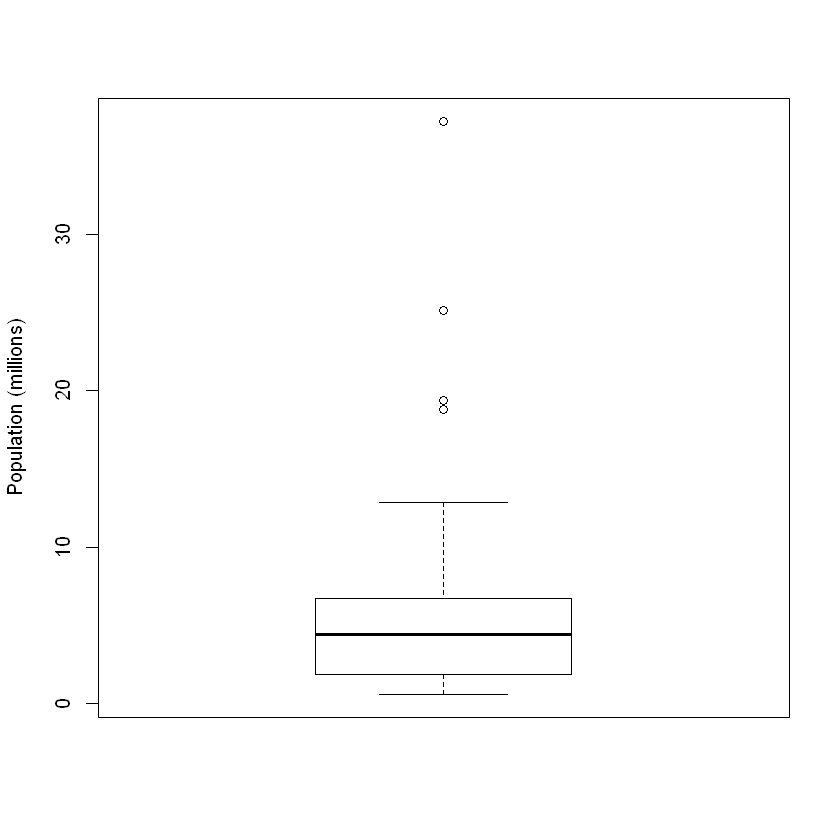

In [2]:
boxplot(state[['Population']]/1000000, ylab='Population (millions)')

The top and the bottom of the box are 75th and 25th percentile. The median shows the horizontal line in the box. The dashed line are referred to as whiskers, which indicates the range of the data.

** Frequency tables and Histograms **

In [4]:
breaks <- seq(from=min(state[['Population']]),
              to=max(state[['Population']]), length=11)
pop_freq <- cut(state[['Population']], breaks=breaks, right=TRUE, include.lowest=TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

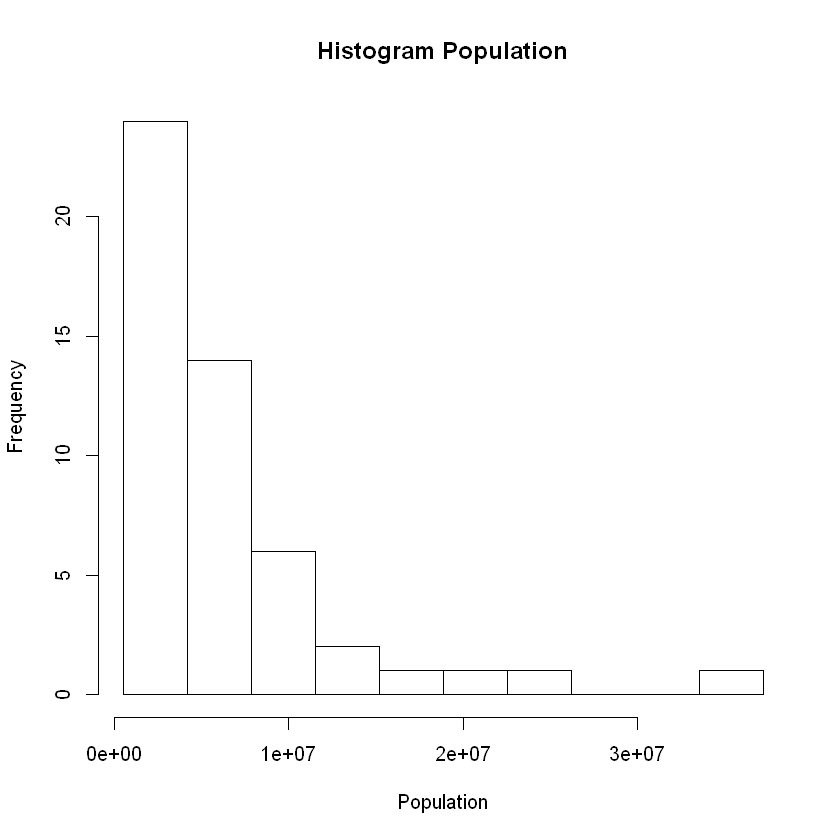

In [5]:
hist(state[['Population']], breaks=breaks, xlab="Population", main="Histogram Population")

**Density Estimates**

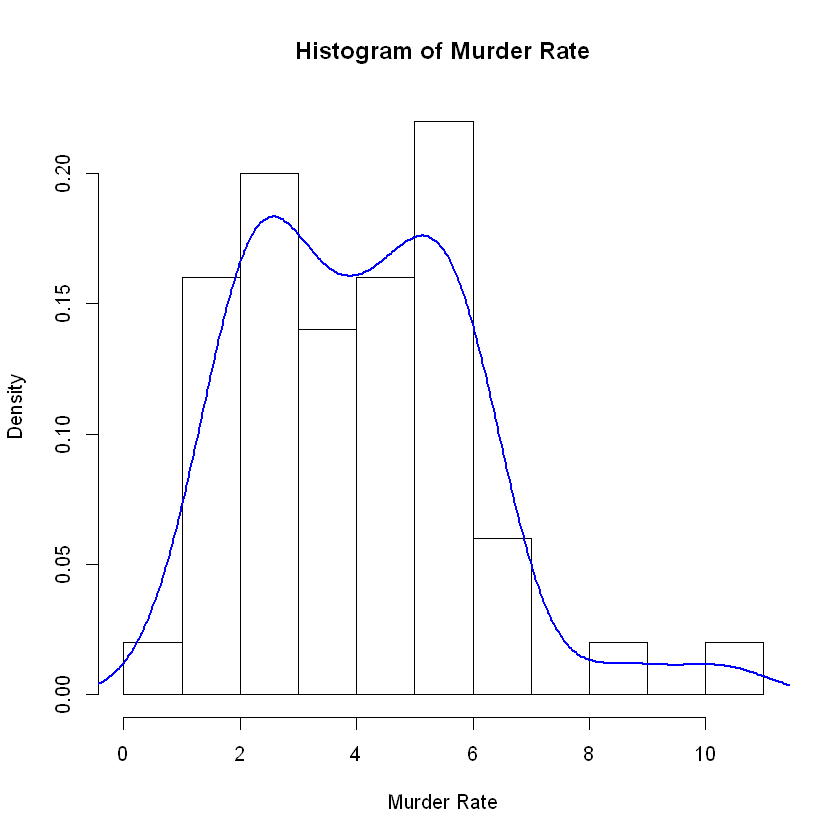

In [6]:
hist(state[["Murder.Rate"]], freq=FALSE, xlab="Murder Rate", main = "Histogram of Murder Rate")
lines(density(state[["Murder.Rate"]]), lwd=2, col="blue")

**Exploring Binary and Categorical Data**

Barplot airline delays at DFW by cause

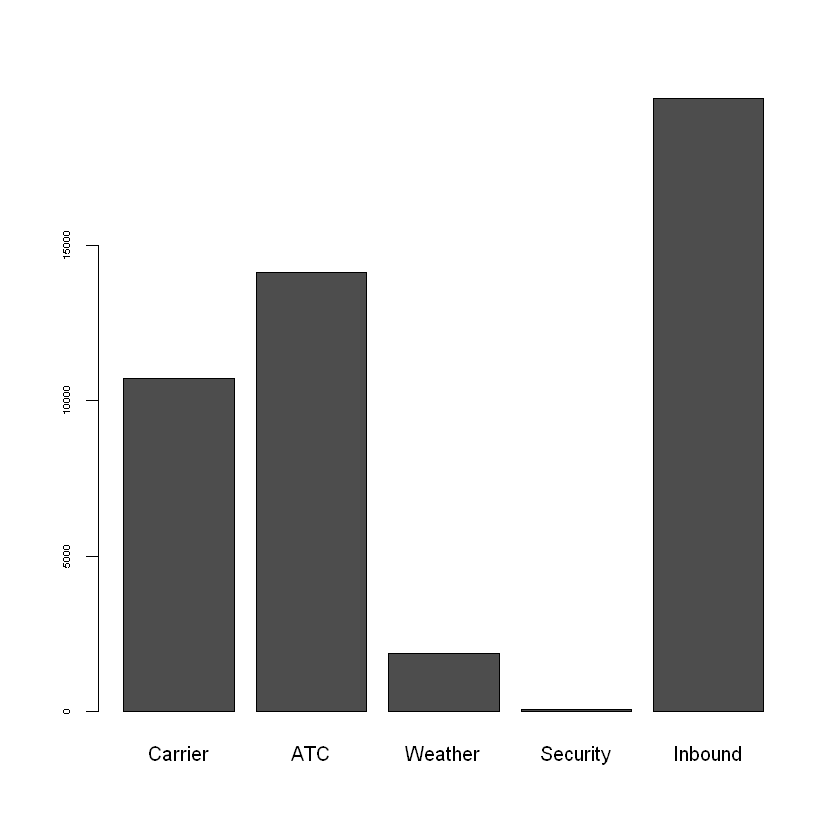

In [7]:
barplot(as.matrix(dfw)/6, cex.axis=.5)

**Mode** <br>
The mode in the above bar graph is Inbound. Mode is a value that appears often in the data

## Correlation

Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

**Pearsons Correlation**

In [30]:
head(sp500[row.names(sp500)>"2012-07-01",
              sp500_sym[sp500_sym$sector=="etf", "symbol"]])

,TMO,HCBK,CB,PCAR,DLPH,AGN,DGX,GM,STJ,ESRX,CAH,PKI,AMGN,CERN,BMY,SYK,VAR
3,0.00000000,0,0.280710,0.03662234,0,0,0,0,0.01871063,0.000000000,-0.03007086,0.20891181,-0.11572003,-0.01562000,-0.11563884,-0.02763172,0.04492286
4,0.12418687,0,0.130998,0.07934032,0,0,0,0,0.18714040,0.023440000,0.00000000,0.12534709,-0.08679003,-0.01172006,0.14133329,0.00000000,0.10480457
5,0.34151042,0,-0.056142,0.10985728,0,0,0,0,-0.18762898,-0.015620000,0.06014184,0.16712947,0.14465004,-0.00782000,-0.11563461,-0.08289515,-0.02994553
6,0.18627509,0,-0.280710,0.01220590,0,0,0,0,-0.15010830,-0.005860032,-0.06014184,-0.04178237,-0.33269069,-0.04688000,0.05139357,0.00000000,-0.02994554
7,0.09313767,0,0.018714,-0.03661741,0,0,0,0,-0.07504988,0.011720000,0.01503567,0.00000000,-0.54967019,-0.09375000,-0.02569498,-0.13815858,0.01497732
8,-0.12418613,0,-0.056142,-0.03661746,0,0,0,0,0.22515820,0.000000000,0.03007086,-0.16712946,0.15911944,-0.00781000,0.00000000,-0.05526342,0.01497732


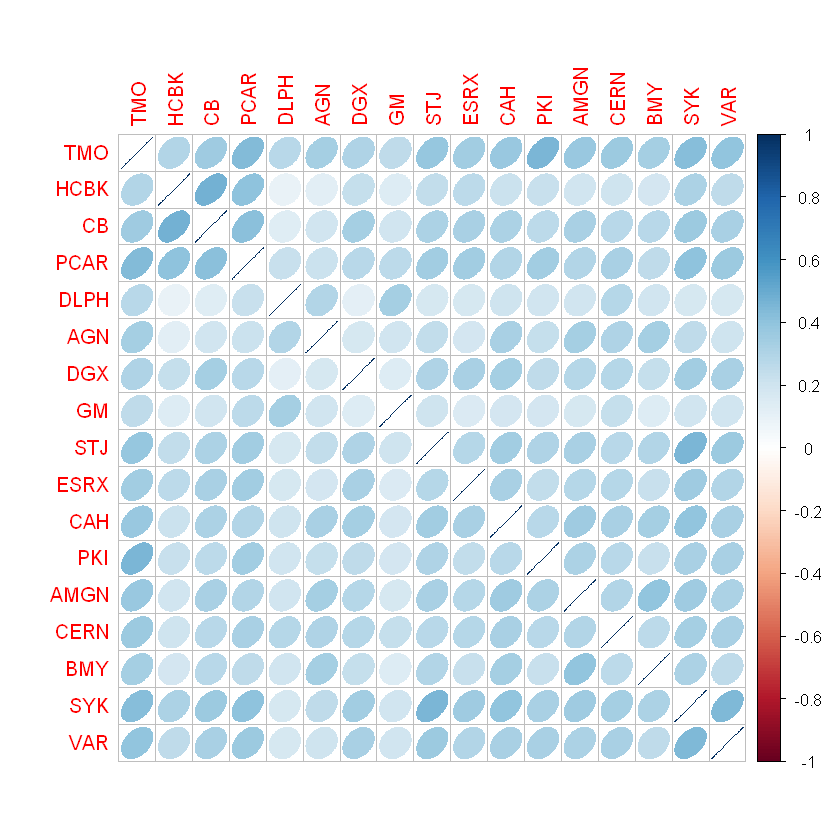

In [31]:
etfs <- sp500[row.names(sp500)>"2012-07-01",
              sp500_sym[sp500_sym$sector=="etf", "symbol"]]
library(corrplot)
corrplot(cor(etfs), method="ellipse")

In [17]:
install.packages("corrplot", "C:/Users/vino2/Anaconda3/Lib/R/library", repos='http://cran.us.r-project.org')

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vino2\AppData\Local\Temp\Rtmp25aijD\downloaded_packages


**Scatterplot**

The standard way to visualize the relationship between two measured data variables is with a scatterplot. The x-axis represents one variable, the y-axis another, and each point on the graph is a record.

In [ ]:
plot(telecom$)